### 🚢 타이타닉 데이터셋 컬럼 설명 (Data Dictionary)

| 영문 컬럼명 | 한국어 번역 | 상세 설명 |
| :--- | :--- | :--- |
| **PassengerId** | 승객 번호 | 각 승객의 고유 ID |
| **Survived** | 생존 여부 | 0: 사망, 1: 생존 (Target Variable) |
| **Pclass** | 티켓 등급 | 1: 1등석, 2: 2등석, 3: 3등석 (사회적/경제적 지위) |
| **Name** | 이름 | 승객의 성명 |
| **Sex** | 성별 | male: 남성, female: 여성 |
| **Age** | 나이 | 승객의 나이 |
| **SibSp** | 형제/배우자 수 | 함께 탑승한 형제자매(Siblings) 또는 배우자(Spouses)의 수 |
| **Parch** | 부모/자녀 수 | 함께 탑승한 부모(Parents) 또는 자녀(Children)의 수 |
| **Ticket** | 티켓 번호 | 티켓의 고유 번호 |
| **Fare** | 요금 | 지불한 탑승 요금 |
| **Cabin** | 객실 번호 | 승객이 머문 객실 번호 (결측치가 많음) |
| **Embarked** | 탑승 항구 | C = 셰르부르, Q = 퀸스타운, S = 사우샘프턴 |

#### 분석 할 수 있는 정보 정리  
1. 객실에 따른 생존율이 다른가?
2. 성별에 따른 생존율이 다른가?
3. 나이에 따른 생존율이 다른가?
    - 호칭으로 연령대를 구분하여 확인
    - 연령대별 생존율 확인

### 1. 주요 호칭 (가장 빈번함)
    대부분의 승객은 아래 네 가지 호칭 중 하나에 해당합니다.
    
    Mr: 성인 남성

    Miss: 미혼 여성

    Mrs: 기혼 여성

    Master: 주로 18세 미만의 어린 소년

### 2. 전문직 및 귀족/특수 호칭
    특정한 직업이나 사회적 지위를 나타내는 드문 호칭들입니다.

    Dr: 의사 또는 박사

    Rev: 목사 (Reverend)

    Col / Major / Capt: 군 장교 (대령, 소령, 선장)

    Don / Jonkheer / Sir: 귀족 또는 경칭

    Lady / Countess (the Countess): 귀족 여성

    Mlle / Mme: 프랑스식 호칭 (Mademoiselle, Madame)

    Ms: 혼인 여부와 상관없는 여성 호칭

#### 이 파일의 ############# 로 표시된 부분은
#### 다른 파일에서 따오거나 프롬프트를 작성해서 생성형 AI를 통해 만들어낸 코드입니다.

1. 시각화 코드와 파일생성 코드는 생성형 Ai
2. 모델 학습 및 평가

### 사용한 프롬프트

TitanicProject.ipynb

여기서 데이터 시각화를 할 수 있는 여러가지 방법이랑

8가지 모델로 학습, 예측을 하는 코드를 만들어주고, 가장 성능 좋은 4가지 모델을 추려서 앙상블을 실행해줘

그리고 결과를 표출해줘

### 라이브러리 정리

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

import warnings
warnings.filterwarnings('ignore')

### 타이타닉 데이터 파일 가져오기

In [2]:
HOME = os.getcwd()
train_df = pd.read_csv(os.path.join(HOME,'data/titanic/train.csv'))

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 결측치 확인 및 전처리 과정

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train_df = train_df.drop(columns=['Cabin'])

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [7]:
# Embarked의 결측치 내용 확인 후 가장 많은 생존자가 있는 항구의 번호로 대체
df_missing = train_df[train_df['Embarked'].isnull()]
df_missing

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [8]:
survival_rate = train_df.groupby('Embarked')['Survived'].sum()
survival_rate

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64

In [9]:
bp = survival_rate.idxmax()
bp

'S'

In [10]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [ ]:
# 1. 가족 관련 피처 생성
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# 2. 나이 * 객실 등급 (상호작용 피처)
df['Age_Class'] = df['Age'] * df['Pclass']

# 3. 요금의 로그 변환 (치우침 해소)
df['Fare'] = df['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

In [11]:
# 이름에서 호칭을 분리
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# 해당 호칭을 사용하는 사람들의 인원 수 와 생존율
title_anal = train_df.groupby('Title')['Survived'].agg(['mean', 'count'])
print(title_anal.sort_values(by='mean', ascending=False))

              mean  count
Title                    
Countess  1.000000      1
Ms        1.000000      1
Lady      1.000000      1
Mme       1.000000      1
Mlle      1.000000      2
Sir       1.000000      1
Mrs       0.792000    125
Miss      0.697802    182
Master    0.575000     40
Major     0.500000      2
Col       0.500000      2
Dr        0.428571      7
Mr        0.156673    517
Capt      0.000000      1
Don       0.000000      1
Jonkheer  0.000000      1
Rev       0.000000      6


In [12]:
# 같은 의미의 호칭 통합
train_df['Title'] = train_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

# 그 외 전문직/귀족 호칭은 'Rare'로 통합
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Capt', 'Sir', 'Lady', 'Don', 'Jonkheer']
train_df['Title'] = train_df['Title'].replace(rare_titles, 'Rare')

In [13]:
# 호칭을 사용하는 사람들의 인원 수 와 생존율
title_anal = train_df.groupby('Title')['Survived'].agg(['mean', 'count'])
print(title_anal.sort_values(by='mean', ascending=False))

            mean  count
Title                  
Mrs     0.793651    126
Miss    0.702703    185
Master  0.575000     40
Rare    0.347826     23
Mr      0.156673    517


In [14]:
# 여자아이와 성인 여성을 구분하기 위해 Fare를 Pclass별로 중앙값으로 대체
fare_median = train_df.groupby('Pclass')['Fare'].median()
fare_median

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [15]:
# Title이 Miss인 인원 중 여러 조건을 대어 처리
def class_miss(row):
    if row['Title'] == 'Miss':
        if row['Age'] <= 15: # 15세 이하이면 Child로 변경
            return 'Child'

        elif pd.isnull(row['Age']): # Age가 결측치이면
            if row['Parch'] > 0 and row['Fare'] <= fare_median[row['Pclass']]: # Parch가 1이상이고 Fare가 Pclass별 중앙값 이하이면 Child로 변경
                return 'Child'

    return row['Title']

train_df['Title'] = train_df.apply(class_miss, axis=1)

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [16]:
# Child에 Master를 포함
train_df['Title'] = train_df['Title'].replace(['Master', 'Child'], 'Child')

In [17]:
# 호칭별 나이 중앙값으로 결측치 채우기
train_df['Age'] = train_df['Age'].fillna(train_df.groupby('Title')['Age'].transform('median'))

# 확인: 결측치가 0이 되었는지 체크
print(f"결측치 개수: {train_df['Age'].isnull().sum()}")

결측치 개수: 0


In [18]:
# 연령대 나누기 기준 (0~15: 어린이, 15~35: 청년, 35~60: 중년, 60~: 노년)
bins = [0, 15, 35, 60, 100]
labels = [0, 1, 2, 3] # 어린이: 0, 청년: 1, 중년: 2, 노년: 3

train_df['Age_Group'] = pd.cut(train_df['Age'], bins=bins, labels=labels)

# 결과 확인
# ain_df.head()

In [19]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Age_Group      0
dtype: int64

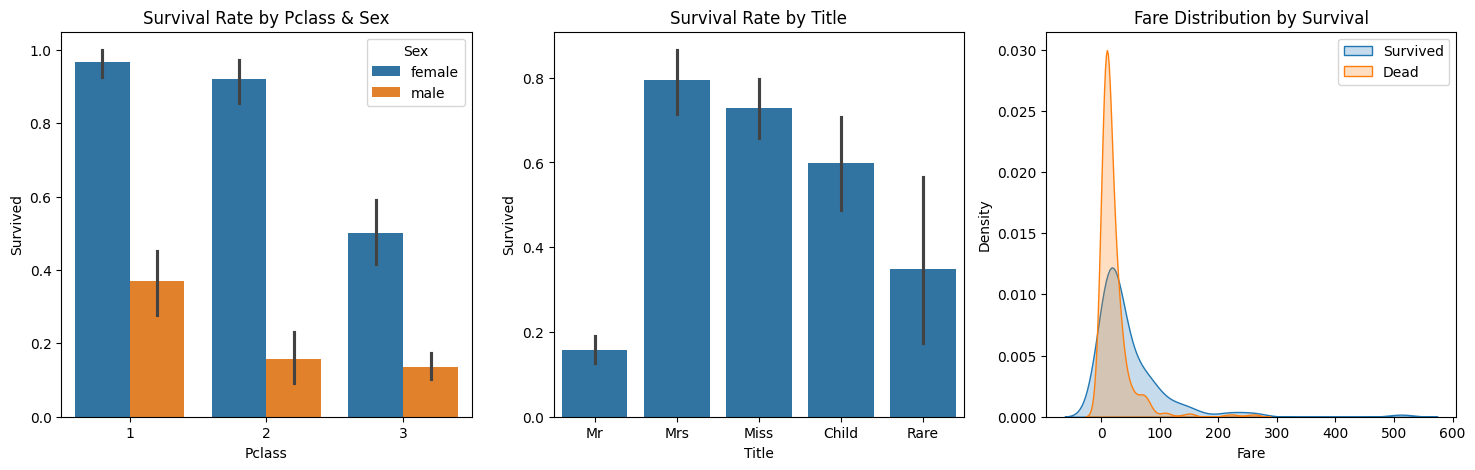

In [20]:
###############################################################################################
# 한 화면에 여러 그래프 그리기
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# 1. 성별 및 등급별 생존율
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_df, ax=ax[0])
ax[0].set_title('Survival Rate by Pclass & Sex')

# 2. 호칭(Title)별 생존율
sns.barplot(x='Title', y='Survived', data=train_df, ax=ax[1])
ax[1].set_title('Survival Rate by Title')

# 3. 요금(Fare) 분포 (생존 여부별)
sns.kdeplot(train_df[train_df['Survived']==1]['Fare'], ax=ax[2], label='Survived', fill=True)
sns.kdeplot(train_df[train_df['Survived']==0]['Fare'], ax=ax[2], label='Dead', fill=True)
ax[2].set_title('Fare Distribution by Survival')
plt.legend()

plt.show()
###############################################################################################

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    object  
 11  Title        891 non-null    object  
 12  Age_Group    891 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


In [22]:
# 문자열을 숫자로 변환
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Child': 3, 'Rare': 4}
train_df['Title'] = train_df['Title'].map(title_mapping)

# 사용할 features(컬럼)을 선택
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']

x = train_df[features]
y = train_df['Survived']

# 데이터를 분할
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(y_train.value_counts())
print(y_test.value_counts())

Survived
0    439
1    273
Name: count, dtype: int64
Survived
0    110
1     69
Name: count, dtype: int64


In [23]:
###############################################################################
# 모델 리스트 준비
models = {
    "Logistic Regression": LogisticRegression(),
    "SVC": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier()
}

# 각 모델 학습 및 결과 저장
model_results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, predictions)
    model_results[name] = acc
    print(f"{name}: {acc:.4f}")

# 성능 순으로 정렬
sorted_results = sorted(model_results.items(), key=lambda x: x[1], reverse=True)
#################################################################################

Logistic Regression: 0.7933
SVC: 0.8268
KNN: 0.8324
Decision Tree: 0.8547
Random Forest: 0.8268
Gradient Boosting: 0.8101
AdaBoost: 0.8156
XGBoost: 0.8045
